# Diccionarios, JSONs y Analísis Estadísticos de Datos
## Ejemplos de clase
### Dr. Antonio Arista Jalife.
Comencemos con la noción básica de diccionarios: Un diccionario está compuesto por un conjunto de pares 'clave'-'valor' (key-value pairs), los cuales pueden ser cualquier variable asociado a una clave en formato "string". Por ejemplo, pongamos algunos datos básicos mios dentro de un diccionario.

In [1]:
profeAntonio = {
    'Nombre':'Antonio',
    'Apellido':'Arista',
    'Edad':32,
    'Hobbies':['Artes Marciales', 'Escritura','Lectura'] 
}

Con los datos en un diccionario, podemos consultar directamente cada uno de los datos utilizando la palabra clave, como en el siguiente ejemplo:

In [2]:
print(profeAntonio['Edad'])

32


In [3]:
print(profeAntonio['Hobbies'])

['Artes Marciales', 'Escritura', 'Lectura']


Asi como es posible acceder a datos de un diccionario, también es posible ditarlos de la siguiente manera:

In [4]:
profeAntonio['Edad'] = 31
profeAntonio['Hobbies'].append('Videojuegos')

print(profeAntonio['Edad'])
print(profeAntonio['Hobbies'])

31
['Artes Marciales', 'Escritura', 'Lectura', 'Videojuegos']


Para saber si hay un dato dentro del diccionario, podemos explorarlo manualmente utilizando la función "values" y "keys". Keys sirve para ver las palabras claves, y values para los valores propiamente dichos. Es importante destacar ue en un diccionario no existe el orden: No hay manera de que un diccionario mantenga nuestros datos en orden, es nuestra tarea de que el orden se mantenga con las palabras claves.

In [5]:
print(profeAntonio.values())

dict_values(['Antonio', 'Arista', 31, ['Artes Marciales', 'Escritura', 'Lectura', 'Videojuegos']])


In [6]:
print(profeAntonio.keys())

dict_keys(['Nombre', 'Apellido', 'Edad', 'Hobbies'])


La palabra reservada 'in' nos sirve para ver si una palabra clave existe en el dicionario. Es una condicional que nos sirve para saber si nos faltan datos, como por ejemplo la estatura

In [7]:
if 'Estatura' in profeAntonio:
    print("Ya tenemos la estatura! es "+profeAntonio['Estatura'])
else:
    print("Falta poner la estatura!")

Falta poner la estatura!


La estatura hace falta en este diccionario, por lo que podemos agregarla como si siempre hubiera existido. el diccionario de Python la agregará por nosotros automáticamente. 

In [8]:
profeAntonio['Estatura']=1.85

La estatura ahora forma parte de los datos de este dicionario, y podemos ver que está presente tanto en la lista, como en su valor.

In [9]:
print(profeAntonio.keys())

dict_keys(['Nombre', 'Apellido', 'Edad', 'Hobbies', 'Estatura'])


In [10]:
print(profeAntonio['Estatura'])

1.85


Supongamos que un dato fue agregado por accidente, por ejemplo, mi tarjeta de crédito :P Para retirar el dato del diccionario, usamos el método "pop"

In [11]:
profeAntonio['Numero de tarjeta de credito']='1001 0110 1337 1100'
print(profeAntonio['Numero de tarjeta de credito'])
#Whops... mejor quito esto...
profeAntonio.pop('Numero de tarjeta de credito')
print(profeAntonio.keys())

1001 0110 1337 1100
dict_keys(['Nombre', 'Apellido', 'Edad', 'Hobbies', 'Estatura'])


## JSONs
Los archivos JSON y los diccionarios son muy similares. Un archivo JSON puede ser una especie de diccionario, el cual puede anidar a otros diccionarios, y estar contenido dentro de un archivo o un string arbitrariamente largo. Es el método de transferencia de información default en un servicio REST.

Con la librería json, y la función json.dumps, puedes generar un string json a partir de un diccionario de python que tengas.

In [12]:
import json

json_profe = json.dumps(profeAntonio, sort_keys = True)
print(json_profe)

{"Apellido": "Arista", "Edad": 31, "Estatura": 1.85, "Hobbies": ["Artes Marciales", "Escritura", "Lectura", "Videojuegos"], "Nombre": "Antonio"}


Con la función json.dump, puedes transformar un diccionario de python a un archivo de texto con un json. Es importante que antes de que hagas la llamada a json.dump abras el archivo. De igual manera, la función json.load te permite cargar los archivos que tengas disponibles en formato JSON y guardarlos en un diccionario de python

In [13]:
with open('contactos.json','wt') as archivo:
    json.dump(profeAntonio, archivo)

In [14]:
with open('contactos.json','rt') as archivo:
    contactos = json.load(archivo)
    print(type(contactos))
    print(contactos.keys())
    print(contactos.values())

<class 'dict'>
dict_keys(['Nombre', 'Apellido', 'Edad', 'Hobbies', 'Estatura'])
dict_values(['Antonio', 'Arista', 31, ['Artes Marciales', 'Escritura', 'Lectura', 'Videojuegos'], 1.85])


Una de las cosas útiles de los JSONs es que puedes agrupar varios diccionarios en un solo elemento JSON, por lo que puedes crear una lista de varios diccionarios, y usar la función json.dumps /json.dump para encapsular todos los diccionarios de la lista en un solo JSON

In [15]:
uno = profeAntonio.copy()
dos = profeAntonio.copy()
tres = profeAntonio.copy()

#... 

contactos = [uno,dos,tres]

contactos_json = json.dumps(contactos)
print(contactos_json)

[{"Nombre": "Antonio", "Apellido": "Arista", "Edad": 31, "Hobbies": ["Artes Marciales", "Escritura", "Lectura", "Videojuegos"], "Estatura": 1.85}, {"Nombre": "Antonio", "Apellido": "Arista", "Edad": 31, "Hobbies": ["Artes Marciales", "Escritura", "Lectura", "Videojuegos"], "Estatura": 1.85}, {"Nombre": "Antonio", "Apellido": "Arista", "Edad": 31, "Hobbies": ["Artes Marciales", "Escritura", "Lectura", "Videojuegos"], "Estatura": 1.85}]


## Uniendo PANDAS, JSONs y diccionarios.
En otra lección vimos el uso de pandas, por lo que ahora veremos como podemos usarlo para trabajar con archivos JSON y con diccionarios. Si nosotros cargamos un json con json.load desde un archivo, podemos generar un diccionario simple. Por ejemplo, esta base de datos de estación de bicicletas.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

with open('Estaciones de bicicletas.json','rt') as archivo:
    json_bicicletas = json.load(archivo)

In [32]:
print(json_bicicletas[0])
print(json_bicicletas[0].keys())

{'datasetid': 'estaciones-de-ecobici', 'recordid': '7d6a85880ee2402aeee40d9590910bbc6ebd7cf2', 'fields': {'districtcode': '1', 'nearbystations_0': 432, 'name': '443 BRUNO TRAVEN-GOLONDRINAS', 'districtname': 'Ampliación Granada', 'zipcode': '3340', 'location_lat': 19.359655, 'punto_geo': [19.359655, -99.162025], 'addressnumber': 'S/N', 'stationtype': 'BIKE', 'nearbystations_2': 444, 'nearbystations_1': 442, 'location_lon': -99.162025, 'id': 443, 'address': '443 - Bruno Trave-Avenida México-Coyoacan'}, 'geometry': {'type': 'Point', 'coordinates': [-99.162025, 19.359655]}, 'record_timestamp': '2018-11-12T17:10:11-06:00'}
dict_keys(['datasetid', 'recordid', 'fields', 'geometry', 'record_timestamp'])


Ya tenemos el diccionario. PANDAS nos permite tomar el diccionario y transformarlo en DataFrame de pandas, el cual nos ayudará a generar un análisis exploratorio de datos mas adelante.

In [33]:
#Normalización del JSON. Esto lo veremos cuando aprendamos a limpiar datos.
json_norm_bicicletas = pd.io.json.json_normalize(json_bicicletas)
dataframe_biciestaciones = pd.DataFrame.from_dict(json_norm_bicicletas)
dataframe_biciestaciones

datasetid                                  recordid  \
0    estaciones-de-ecobici  7d6a85880ee2402aeee40d9590910bbc6ebd7cf2   
1    estaciones-de-ecobici  09d4f3cf20ef0636a24567db330a99d0a9004e63   
2    estaciones-de-ecobici  03473d69d0cc8c888e16082d53cb937bb476ff05   
3    estaciones-de-ecobici  3c4dec61a4efe285ae1bebfa8e1c7368cc4c7e30   
4    estaciones-de-ecobici  8894dca667abb6c1e9b3bf5cad88ddb4ed05f02c   
..                     ...                                       ...   
475  estaciones-de-ecobici  a471c61adcdee7781cfed6aed3a3a8a010cb464c   
476  estaciones-de-ecobici  afafd8ae0102e5a79509255b1819e5e80a1eeb5d   
477  estaciones-de-ecobici  f59590832fccf876ba6376318e774a037006166e   
478  estaciones-de-ecobici  f2da42fcd15f65d7d65f52995b4bb97e207f851f   
479  estaciones-de-ecobici  55503bc9b3c91aeae9015da34eb2f8fe99e73294   

              record_timestamp fields.districtcode  fields.nearbystations_0  \
0    2018-11-12T17:10:11-06:00                   1                      432   
1    2018-11-12T17:10:11-06:00                   1                      390   
2    2018-11-12T17:10:11-06:00                   1                      433   
3    2018-11-12T17:10:11-06:00                   1                       11   
4    2018-11-12T17:10:11-06:00                   1                       29   
..                         ...                 ...                      ...   
475  2018-11-12T17:10:11-06:00                   1                      334   
476  2018-11-12T17:10:11-06:00                   1                      378   
477  2018-11-12T17:10:11-06:00                   1                      401   
478  2018-11-12T17:10:11-06:00                   1                       12   
479  2018-11-12T17:10:11-06:00                   1                      423   

                                 fields.name fields.districtname  \
0               443 BRUNO TRAVEN-GOLONDRINAS  Ampliación Granada   
1                       416 RECREO-PARROQUÍA  Ampliación Granada   
2          440 REAL DE MAYORAZGO-PUENTE XOCO  Ampliación Granada   
3                   12 RIO LERMA-VILLALONGIN  Ampliación Granada   
4             41 REFORMA-AV. DE LA REPUBLICA  Ampliación Granada   
..                                       ...                 ...   
475  347 PENNSYLVANIA-MAXIMINO AVILA CAMACHO  Ampliación Granada   
476     379 DR. ROBERTO GAYOL-MIGUEL LAURENT  Ampliación Granada   
477                402 UXMAL-MUNICIPIO LIBRE  Ampliación Granada   
478                      19 REFORMA-RIO RHIN  Ampliación Granada   
479                        437 MORAS-COMUNAL  Ampliación Granada   

    fields.zipcode  fields.location_lat             fields.punto_geo  ...  \
0             3340            19.359655      [19.359655, -99.162025]  ...   
1             3104            19.371308      [19.371308, -99.177607]  ...   
2             3330            19.360650       [19.36065, -99.168669]  ...   
3            06500            19.432313      [19.432313, -99.161597]  ...   
4            06700            19.435637      [19.435637, -99.150137]  ...   
..             ...                  ...                          ...  ...   
475           3710            19.384378      [19.384378, -99.176097]  ...   
476           3104            19.375751       [19.375751, -99.17084]  ...   
477           3310            19.370945    [19.3709452, -99.1587223]  ...   
478          06500            19.429241      [19.429241, -99.163377]  ...   
479           3240            19.364808  [19.36480833, -99.17602222]  ...   

    fields.nearbystations_2 fields.nearbystations_1  fields.location_lon  \
0                     444.0                   442.0           -99.162025   
1                     415.0                   391.0           -99.177607   
2                     441.0                   439.0           -99.168669   
3                      20.0                    19.0           -99.161597   
4                       NaN                     NaN           -99.150137   
..   

Generemos un dataset mas reducido que nos ayude a trabajar con los datos, por ejemplo: nos interesa el nombre la latitud, longitud, y la estación mas cercana (nearbystations_0).

In [34]:
df_estaciones = dataframe_biciestaciones[['fields.name','fields.location_lat','fields.location_lon','fields.nearbystations_0']]
df_estaciones

fields.name  fields.location_lat  \
0               443 BRUNO TRAVEN-GOLONDRINAS            19.359655   
1                       416 RECREO-PARROQUÍA            19.371308   
2          440 REAL DE MAYORAZGO-PUENTE XOCO            19.360650   
3                   12 RIO LERMA-VILLALONGIN            19.432313   
4             41 REFORMA-AV. DE LA REPUBLICA            19.435637   
..                                       ...                  ...   
475  347 PENNSYLVANIA-MAXIMINO AVILA CAMACHO            19.384378   
476     379 DR. ROBERTO GAYOL-MIGUEL LAURENT            19.375751   
477                402 UXMAL-MUNICIPIO LIBRE            19.370945   
478                      19 REFORMA-RIO RHIN            19.429241   
479                        437 MORAS-COMUNAL            19.364808   

     fields.location_lon  fields.nearbystations_0  
0             -99.162025                      432  
1             -99.177607                      390  
2             -99.168669                      433  
3             -99.161597                       11  
4             -99.150137                       29  
..                   ...                      ...  
475           -99.176097                      334  
476           -99.170840                      378  
477           -99.158722                      401  
478           -99.163377                       12  
479           -99.176022                      423  

[480 rows x 4 columns]

y con esto podemos crear nuestro análisis de datos.

### Análisis estadístico de datos:
Con esto podemos generar un cuadrado donde se encuentran todas las biciestaciones, donde se concentran estadísticamente por media, y donde está la biciestacion mas accesible (cercana a otras)

Análisis estadístico de datos: EDA
Maxima latitud: 19.446073
Minima latitud: 19.35827
Maxima longitud: -99.130918
Minima longitud: -99.212845
Latitud promedio:19.40964677416667
Longitud promedio:-99.17091768453243
Estaciones mas céntricas (por histograma):
Estacion mas céntrica:


0    176
dtype: int64

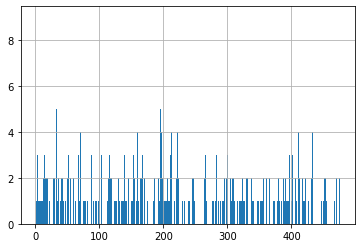

In [44]:
print("Análisis estadístico de datos: EDA")
print("Maxima latitud: "+str(df_estaciones['fields.location_lat'].max()))
print("Minima latitud: "+str(df_estaciones['fields.location_lat'].min()))
print("Maxima longitud: "+str(df_estaciones['fields.location_lon'].max()))
print("Minima longitud: "+str(df_estaciones['fields.location_lon'].min()))
print("Latitud promedio:"+str(df_estaciones['fields.location_lat'].mean()))
print("Longitud promedio:"+str(df_estaciones['fields.location_lon'].mean()))

print("Estaciones mas céntricas (por histograma):")
binsToUse = df_estaciones['fields.nearbystations_0'].max()
df_estaciones['fields.nearbystations_0'].hist(bins = binsToUse)
print("Estacion mas céntrica:")
df_estaciones['fields.nearbystations_0'].mode()